<a href="https://colab.research.google.com/github/EdFlo15/notebooks/blob/main/variety-wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wine Data Set:
https://archive.ics.uci.edu/ml/datasets/Wine

Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging. 

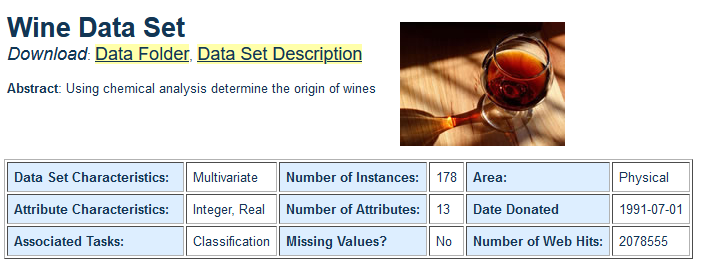

In [4]:
# libreria requerida para realizar curva roc
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# Version de python utilizada en el entorno
!python -V

Python 3.8.16


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# metricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import scikitplot as skplt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [10]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None, delimiter=',')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Guardamos el nombre de las columnas(features) en una lista para posteriormente colocarlas en el dataframe. class_names se utiliza posteriormente para realizar las tablas de clasifiación.

In [12]:
all_names=['variety','Alcohol','Malic-acid','Ash','Alcalinity-of-ash','Magnesium','Total-phenols','Flavanoids','Nonflavanoid-phenols','Proanthocyanins',
'Color_intensity','Hue','OD280','Proline']

names_features=['Alcohol','Malic-acid','Ash','Alcalinity-of-ash','Magnesium','Total-phenols','Flavanoids','Nonflavanoid-phenols','Proanthocyanins',
'Color_intensity','Hue','OD280','Proline']

class_names=['variety1','variety2','variety3']

In [13]:
df.columns=all_names
df

,variety,Alcohol,Malic-acid,Ash,Alcalinity-of-ash,Magnesium,Total-phenols,Flavanoids,Nonflavanoid-phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Podemos ver el número de registros, el tipo de variable y si se encuentran o no nulos en cada una de las variables. Del analisis se observa que no hay nulos

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   variety               178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic-acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity-of-ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total-phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid-phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Ahora realiemos una anlisis descriptivo de las variables para identificar su distribucion en percentiles para identificar posibles atipicos.


In [16]:
df.describe(percentiles=[0.05,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,99%,max
variety,178.0,1.938202,0.775035,1.00,1.0000,1.0000,2.000,3.0000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,11.6585,12.3625,13.050,13.6775,14.4728,14.83
Malic-acid,178.0,2.336348,1.117146,0.74,1.0610,1.6025,1.865,3.0825,5.5422,5.80
Ash,178.0,2.366517,0.274344,1.36,1.9200,2.2100,2.360,2.5575,2.9890,3.23
Alcalinity-of-ash,178.0,19.494944,3.339564,10.60,14.7700,17.2000,19.500,21.5000,28.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,80.8500,88.0000,98.000,107.0000,141.7600,162.00
Total-phenols,178.0,2.295112,0.625851,0.98,1.3800,1.7425,2.355,2.8000,3.5959,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,0.5455,1.2050,2.135,2.8750,3.7914,5.08
Nonflavanoid-phenols,178.0,0.361854,0.124453,0.13,0.1900,0.2700,0.340,0.4375,0.6300,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,0.7300,1.2500,1.555,1.9500,3.0336,3.58


En los datos preliminarmente se observa una consistencia en los datos sin atipicos pronunciados

Con el fin de analizar como es la dispersion a nivel grafico seleccionamos solo algunas variables. Dejando Magnesium y Proline para analizar individualmente debido a que tienen valores altos

In [17]:
names_selected=['Alcohol','Malic-acid','Ash','Alcalinity-of-ash','Total-phenols','Flavanoids','Nonflavanoid-phenols','Proanthocyanins',
'Color_intensity','Hue','OD280']

Se crea un nuevo dataframe con las variables seleccionadas

In [18]:
df2=df[names_selected]

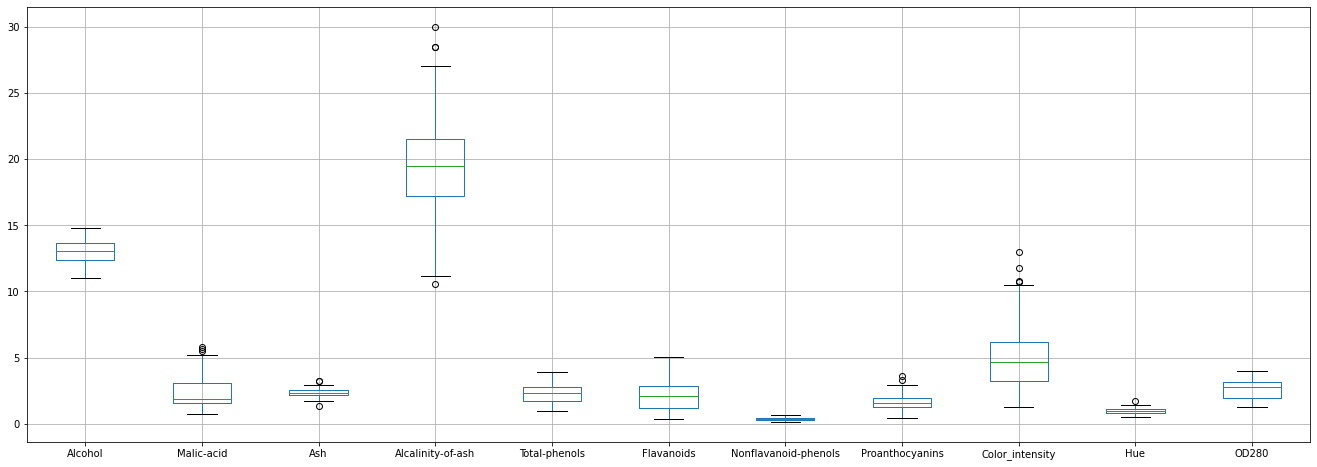

In [20]:
df2.boxplot(figsize=(23,8))
plt.show()

Como se observa el grafico de boxplot, algunas variables como malic-acid, Ash, alcalinity-of-ash, proanthocyanins, color_intensity y hue presentan atipicos, sin embargo no son atipicos que requieran ser eliminados por lo que se dejan en el dataframe

Ahora analicemos de manera independiente la variable Proline la cual tiene valores que van desde 278 a 1680. Como se observa no se encuentran valores atipicos

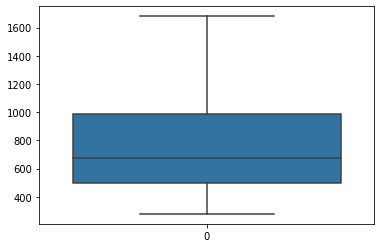

In [21]:
sns.boxplot(data=df['Proline'])
plt.show()


Ahora analicemos de manera independiente la variable Magnesium la cual tiene valores que van desde 70 a 162 Como se observa 4 valores son atipicos pero son aceptables para trabajar con ellos  con el fin de evitar perder informacion valiosa.

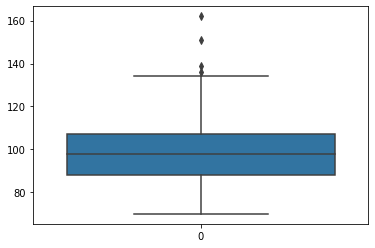

In [22]:
sns.boxplot(data=df['Magnesium'])
plt.show()

Ahora analicemos las correlaciones entre las diferentes variables: Este analisis tiene sentido para las variables independientes ya que la variable objetivo es categorica (variable numerica ordinal)

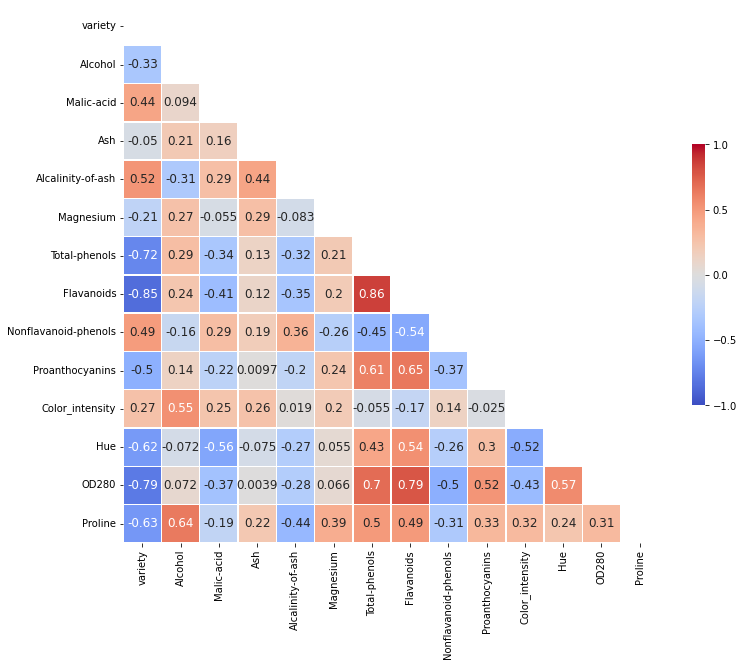

In [23]:
corr_matrix=df.corr()
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.show()


Se observa una alta correlacion positiva entre las variables Flavanoids y Total-phenols y entre 0D280 y Flavanoids

Finalmente analicemos la variable  dependiente: Se observa que las clases no presentan un desbalanceo significativo por lo que se pude dejar sin tratamiento

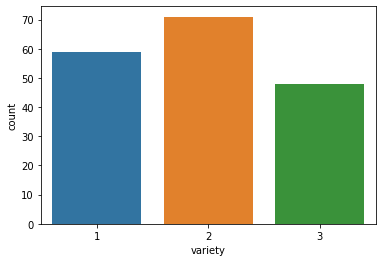

In [24]:
sns.countplot(data=df, x='variety')
plt.show()

### Analisis Univariado y bivariado con respecto a la variable objetivo

In [25]:
df3=df
df3['variety'] = df3['variety'].apply(lambda x: str(x)) 

Debido a que hay varias varaibles, particionamos el dataframe en dos partes para poder realizar el analisis gráfico un poco mejor

In [26]:
df4=df3[['variety','Alcohol','Malic-acid','Ash','Alcalinity-of-ash','Magnesium','Total-phenols','Flavanoids']]

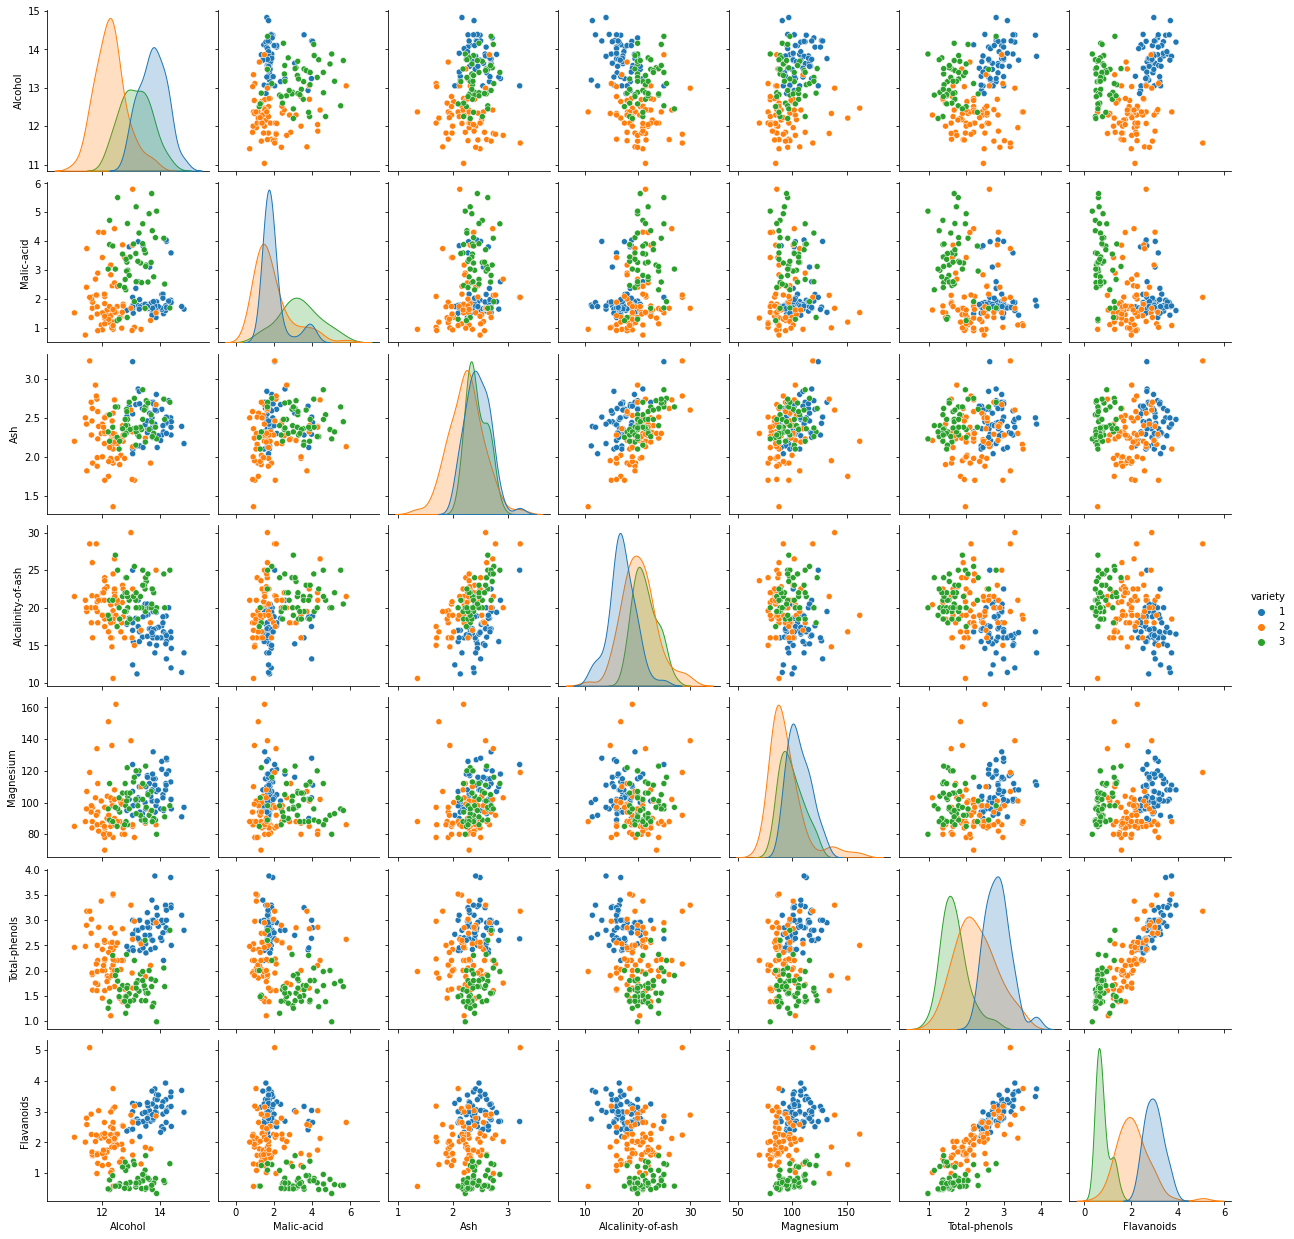

In [27]:
sns.pairplot(df4,hue="variety")
plt.show()

En la gráfica anterior podemos observar como se distribuye cada una de las variables con la variable objetivo. Se puede onbservar que la variable Alcohol pesenta una buena seperación de los tipos de vinos igualmente la variable Flavanoids. Estas son variables que podrían explicar bien los diferentes tipos de vinos.

Al realizar el analisis bivariado entre la variable Alcohol y Flavanoids versus la variaible objetivo, se observa una separación clara entre las clases, por lo tanto estas dos variables son importantes en el modelo

Ahora analizamos las otras variables restantes

In [28]:
df5=df3[['variety','Nonflavanoid-phenols','Proanthocyanins','Color_intensity','Hue','OD280','Total-phenols','Proline']]

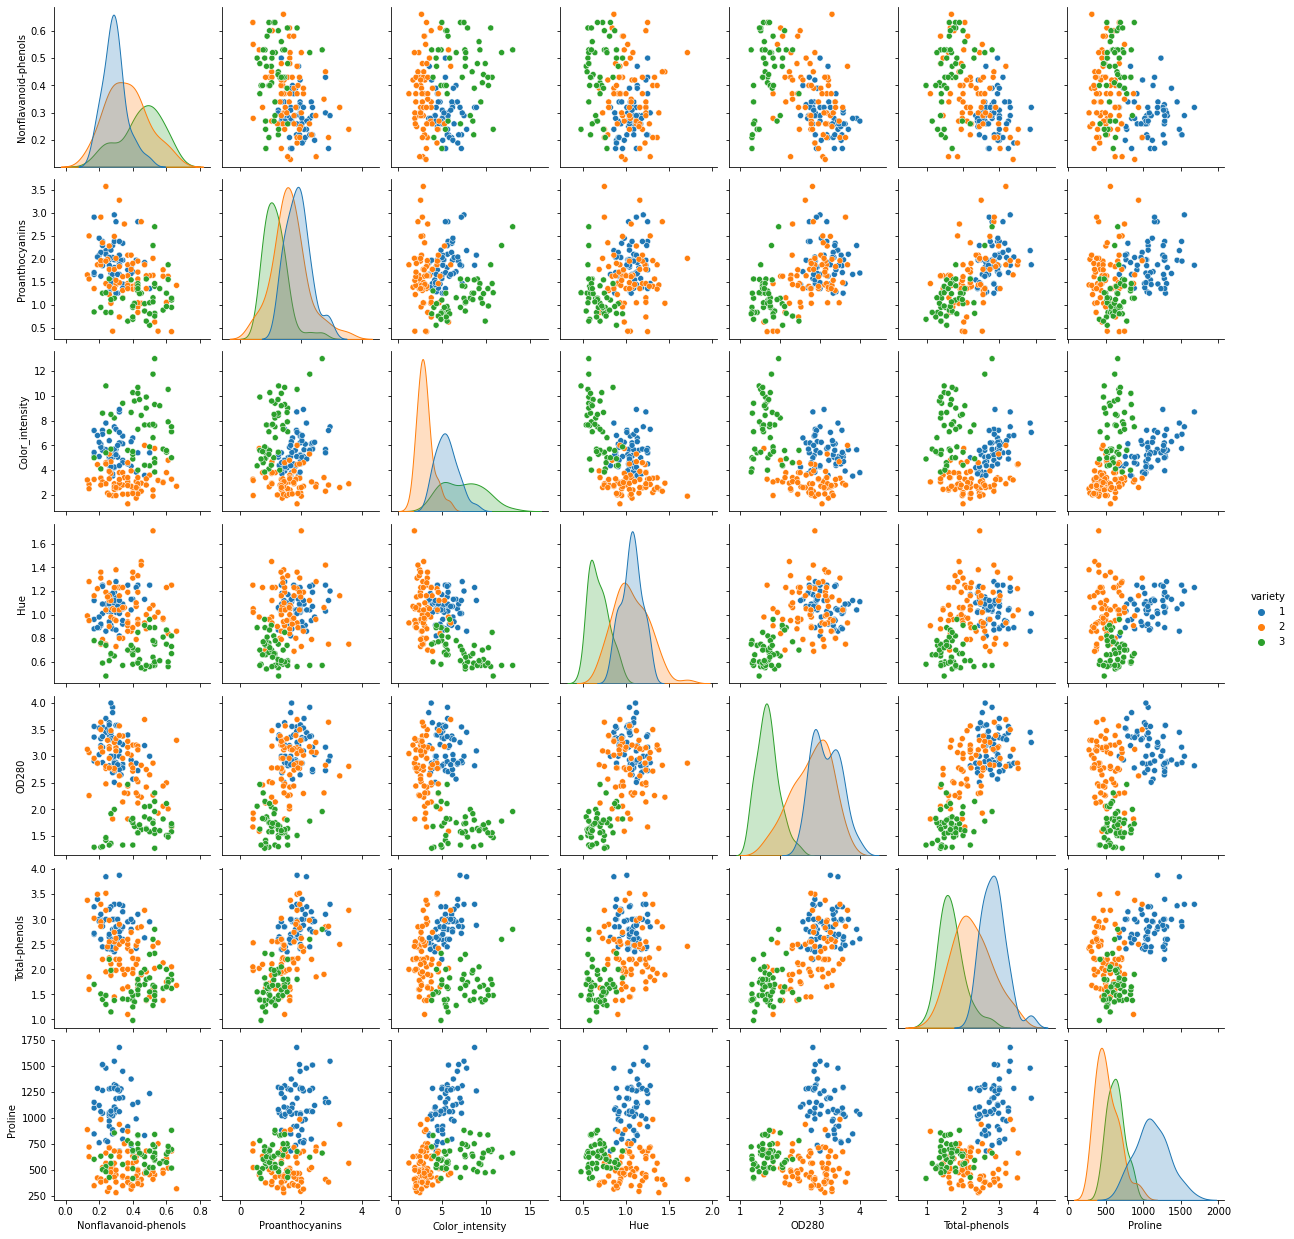

In [29]:
sns.pairplot(df5,hue="variety")
plt.show()

La variable color-intensity y proline tambien podrían ser dos varaibles importantes para el modelo de acuerdo con analisis gráfico ya que la distribución para las tres categorias de la variable de respuesta presentan una seprabilidad marcada. igualmente al realizar el analisis bivariado con esta dos variables se podria obtener un buen modelo con estas dos variables.

### Modelado

In [30]:
df

,variety,Alcohol,Malic-acid,Ash,Alcalinity-of-ash,Magnesium,Total-phenols,Flavanoids,Nonflavanoid-phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Para realizar el modelo, separamos las features del target.

In [31]:
features=df.iloc[:,1:]
features

,Alcohol,Malic-acid,Ash,Alcalinity-of-ash,Magnesium,Total-phenols,Flavanoids,Nonflavanoid-phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [32]:
target=df['variety']

Importante realizar la partición de los datos para dejar un 80% para el entrenamiento (142 registros) y 20% para validación (36 registros). Random_state para garantizar la repeticion de los resultados  suffle=True para aletoriedad de los datos.

In [33]:
# Create train and test data
feature_train, feature_test, target_train, target_test=train_test_split(
                                        features,
                                        target,
                                        random_state=0,
                                        test_size=0.20,
                                        shuffle=True
                            )

Verificamos el tamaño de los dataframe

In [34]:
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)


(142, 13)
(36, 13)
(142,)
(36,)


### Logistic Regresion

cuando contamos con una variable de respuesta con mas de dos categorias podemos hacer One Versus Rest (ovr)
tambien es posible hacer uso del de multi_class="multinimomial" especificando el max_iter que es el maximo numero
de iteraciones para alcanzar la convergencia.

In [35]:
clasifier=LogisticRegression(random_state=0, multi_class="multinomial", max_iter=20000, solver='lbfgs', penalty='l2')

In [36]:
# train model. Nota: cuando se cuenta con una gran cantidad de datos, es una buena idea probar el solver: SAG, sin embargo para este caso el conjunto de datos es pequeño
model=clasifier.fit(feature_train, target_train)

In [37]:
target_predict_proba=model.predict_proba(feature_test)
target_predict=model.predict(feature_test)

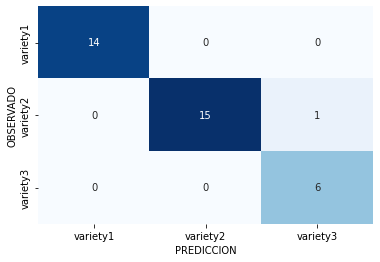

In [42]:
matrix=confusion_matrix(target_test, target_predict)
matrix

# create dataframe
dataframe=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.xlabel("PREDICCION")
plt.ylabel("OBSERVADO")

plt.show()

Como se observa en la tabla de clasificación se obtienen muy buenos resultados sobre los datos de test (validacion). Solo se obtiene un error en la clasificación. Que corresponde  a la variedad 2. 

Interpretemos los resultados para la variedad 2: De 16 tipos de vinos de la variedad 2, el modelo logró clasificar correctamente 15. Recall (VP/VP+FP)=0.9375.

Las predicciones totales para la variedad 2 fueron toda correctas, el modelo no se equivocó para este tipo de vino. precision 100%. El accuracy del modelo es del 0.97

In [43]:
print(classification_report(target_test, target_predict, target_names=class_names))


              precision    recall  f1-score   support

    variety1       1.00      1.00      1.00        14
    variety2       1.00      0.94      0.97        16
    variety3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



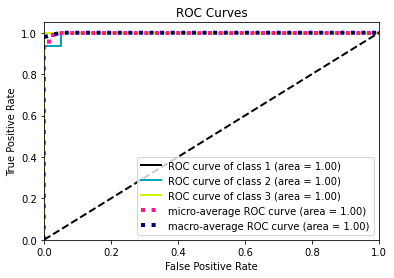

In [44]:
skplt.metrics.plot_roc(target_test, target_predict_proba)
plt.show()

### SVC

El metodo SVc es lento cuento se tienen grandes cantidades de datos, sin embargo para este problema especifico en donde se cuentan con pocas muestras se puede utilizar sin ningun problema

In [45]:
steps = [('STD', StandardScaler()), ('SVM_rbf', SVC(kernel='rbf',probability=True))]
pipeline = Pipeline(steps) # define the pipeline object.

In [46]:
parameters = {'SVM_rbf__C':[0.001,0.1,1,10,20,50,100,1000,100000], 'SVM_rbf__gamma':[0.01,0.1,1,2,20],'SVM_rbf__kernel': ['rbf']}
#parameters = {'SVM__C':[0.001,0.1,1,10,20,50,100,1000,100000], 'SVM__kernel': ['linear']}
#parameters = {'SVM__C':[0.001,0.1,1,10,20,50,100,1000,100000], 'SVM__kernel': ['poly'],'SVM__gamma':[0.01,0.1,1,2,20],'SVM__degree':[2,3,4]}

In [47]:
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5,scoring='accuracy')
grid.fit(feature_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('STD', StandardScaler()),
                                       ('SVM_rbf', SVC(probability=True))]),
             param_grid={'SVM_rbf__C': [0.001, 0.1, 1, 10, 20, 50, 100, 1000,
                                        100000],
                         'SVM_rbf__gamma': [0.01, 0.1, 1, 2, 20],
                         'SVM_rbf__kernel': ['rbf']},
             scoring='accuracy')

In [48]:
grid.best_params_

{'SVM_rbf__C': 1, 'SVM_rbf__gamma': 0.01, 'SVM_rbf__kernel': 'rbf'}

In [49]:
predict_svc=grid.predict(feature_test)
predictt_proba_svc=grid.predict_proba(feature_test)

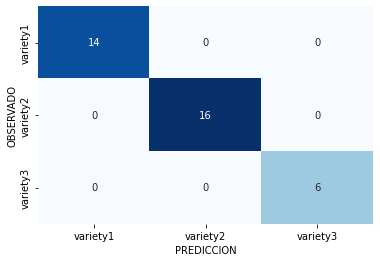

In [50]:
matrix=confusion_matrix(target_test, predict_svc)
matrix

# create dataframe
dataframe=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.xlabel("PREDICCION")
plt.ylabel("OBSERVADO")
plt.show()

En el caso de el clasificador Support Vector Machine el recall y la precision  fueron del 100%. No se tienen errores. Este tipo de problemas son pocos comunes en muchos de los problemas de analitica, sin embargo en este caso los datos con los que se cuentan explican muy bien la variable objetivo

In [51]:
print(classification_report(target_test, predict_svc, target_names=class_names))

              precision    recall  f1-score   support

    variety1       1.00      1.00      1.00        14
    variety2       1.00      1.00      1.00        16
    variety3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



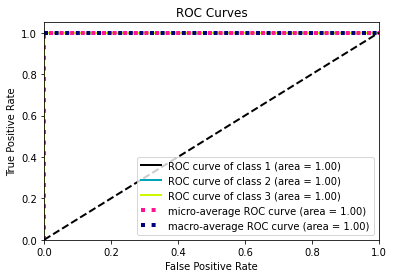

In [52]:
skplt.metrics.plot_roc(target_test, predictt_proba_svc)
plt.show()

### Busqueda de hiperparametros Random Forest

Tambien podemos intentar una busqueda aleatoria de hiperparametros y con random forest

In [53]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
#max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]
# seleccion de gini o entropia
criterion=['gini', 'entropy']


# Create the random grid
hyperparameters_tuning = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criterion}

print(hyperparameters_tuning)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40, 60, 80, 100], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [54]:
# First create the base model to tune
modeloRF = RandomForestClassifier()

# Definition of the random search
random_search_RF= RandomizedSearchCV(estimator=modeloRF,
                                   param_distributions=hyperparameters_tuning,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=5, 
                                   verbose=1)

# Fit the random search model
random_search_RF.fit(feature_train, target_train)
print("Mejores hiperparametros:",random_search_RF.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparametros: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40, 'criterion': 'gini', 'bootstrap': False}


In [55]:
predict_RF=random_search_RF.predict(feature_test)
predict_proba_RF=random_search_RF.predict_proba(feature_test)

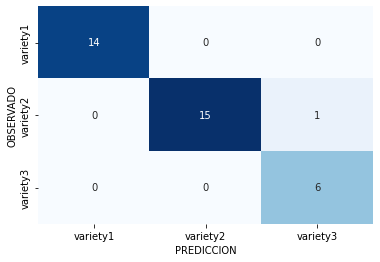

In [56]:
matrix=confusion_matrix(target_test, predict_RF)
matrix

# create dataframe
dataframe=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.xlabel("PREDICCION")
plt.ylabel("OBSERVADO")
plt.show()

El resultado de clasificación con Random Forest es similar que con regresión logistica. El accuracy es del 0.97

In [57]:
print(classification_report(target_test, predict_RF, target_names=class_names))

              precision    recall  f1-score   support

    variety1       1.00      1.00      1.00        14
    variety2       1.00      0.94      0.97        16
    variety3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



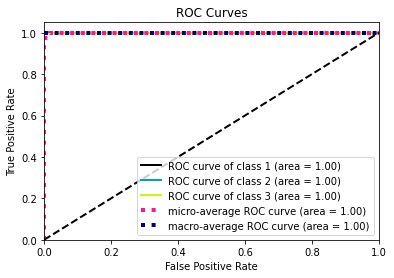

In [58]:
skplt.metrics.plot_roc(target_test, predict_proba_RF)
plt.show()

## Prediccion de nuevas muestras

Se deben organizar los datos de entrada tal y como los recibe el modelo y tal como se ingresaron en el entrenamiento. El mejor modelo seleccionado es el clasificado SVC con paramertos {'SVM_rbf__C': 1, 'SVM_rbf__gamma': 0.01, 'SVM_rbf__kernel': 'rbf'}

In [59]:
muestra1=[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285]
muestra2=[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]
dic={'muestar1':muestra1,'muestar2':muestra2}

In [60]:
df_muestra=pd.DataFrame(dic,index=None)
df_muestra=df_muestra.transpose()
df_muestra.columns=names_features
df_muestra.reset_index(drop=True, inplace=True)
df_muestra


,Alcohol,Malic-acid,Ash,Alcalinity-of-ash,Magnesium,Total-phenols,Flavanoids,Nonflavanoid-phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0
1,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0


Como se observa la nueva muestra se ajusta en un dataframe para luego pasarla al mejor modelo.

La predicción de la primera muestra corresponde a la variedad 1

In [61]:
print(grid.predict(df_muestra))

['1' '2']


De igual manera podemos mostrar los resultados en probabilidades

In [62]:
print(grid.predict_proba(df_muestra))

[[0.99394171 0.00164817 0.00441012]
 [0.00448985 0.98355626 0.01195389]]


## Conlusiones

Los datos a pesar de ser pocos,  son suficientes para clasificar correctamente la variedad de la uva, se obtuvo metricas del 100% con SVC. Estos tipos de problemas en donde el clasificador es casi perfecto son pocos frecuentes en la mayoria de los problemas de analitica, sin embargo en este caso particular los datos son suficientes para explicar la variable objetivo. Como se muestra para 36 muestras de validación no usados en el entrenamiento, el modelo logra detectarlos correctamente a todos.